In [4]:
import itertools

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

from models import BaselineSpiralClassifier
from preprocess import load_tensors, phi

from training import TrainingInstance

plt.style.use('ggplot')

seed = 12345324
np.random.seed(seed)
torch.random.manual_seed(seed)

baseline_model = BaselineSpiralClassifier()
loss = nn.BCEWithLogitsLoss()

epochs = 1
inertia = 0.7
a1 = 1.5
a2 = 1.8
population_size = 30
search_range = 500

x_train, y_train, x_val, y_val, x_test, y_test = load_tensors('/home/mclancy/Documents/notes/edinburgh/year4/naturalcomputing/coursework/data/two_spirals.dat')

In [17]:
a1_range = np.arange(0, 5.1, 0.1)
a2_range = np.arange(1.8, 2.3, 0.1)

a1a2_pairs = list(itertools.product(a1_range, a2_range))

training_instances = []
for a1a2 in itertools.product(a1_range, a2_range):
    training_instance = TrainingInstance(
        instance_name=r"$\a1 = {:.2f}; a2= {:.2f}$".format(a1a2[0], a1a2[1]), model=baseline_model, loss=loss, epochs=epochs,
        inertia=inertia, a1=a1a2[0], a2=a1a2[1], population_size=population_size, search_range=search_range, seed=seed
    )
    training_instance.fit(x_train=phi(x_train), y_train=y_train, x_val=phi(x_val), y_val=y_val)
    training_instances.append(training_instance)

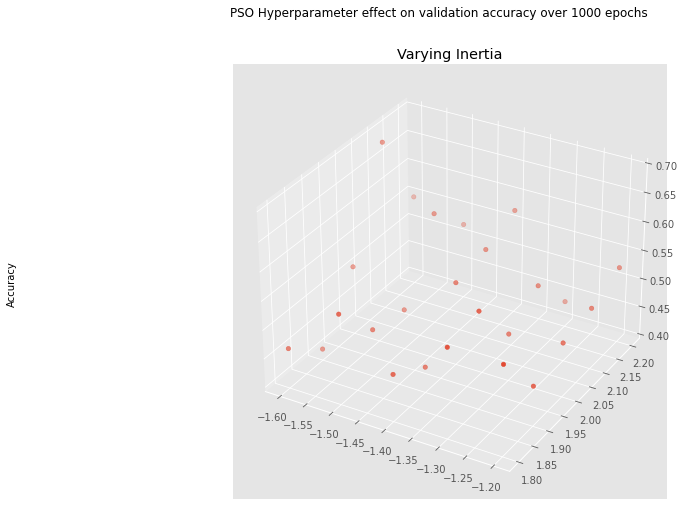

In [23]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

fig.text(0, 0.5, 'Accuracy', va='center', rotation='vertical')
plt.suptitle("PSO Hyperparameter effect on validation accuracy over 1000 epochs")

training_accuracies = [training_instance.get_performances().loc[("val", "accuracy")].iloc[-1] for training_instance in training_instances]
ax.set_title("Varying Inertia")

a1_xs = [x[0] for x in a1a2_pairs]
a2_xs = [x[1] for x in a1a2_pairs]
ax.scatter(a1_xs, a2_xs, training_accuracies)
plt.show()